In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib ipympl
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np


In [2]:
df_nba_data = pd.read_csv("./nba_team_stats/nba_team_stats_filtered_for_proj.csv")
df_nba_data['team'] = pd.Categorical(df_nba_data['team'])   # Overwrites 'team' column as a categorical column.


In [3]:
# analysis below
df_nba_data.describe()


,win_percentage,minutes_per_game,points_per_game,two_pointers_made_per_game,two_pointers_attempted_per_game,three_pointers_made_per_game,three_pointers_attempted_per_game,free_throws_made_per_game,free_throws_attempted_per_game,offensive_rebounds_per_game,defensive_rebounds_per_game,assists_per_game,turnovers_per_game,steals_per_game,blocks_per_game,blocks_attempted_per_game,personal_fouls_per_game,season
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.499112,48.367945,103.153024,29.795554,60.119017,8.544921,23.932365,17.927153,23.519589,10.927062,32.015471,22.856289,14.528137,7.637779,4.950106,4.954754,20.545206,13.726257
std,0.151695,0.185487,8.413722,1.935387,5.739251,3.337847,8.901671,1.877023,2.503212,1.262302,2.279423,2.754856,1.241433,0.826236,0.835766,0.699622,1.806331,7.222618
min,0.106000,48.000000,84.158537,24.158537,45.152778,2.731707,7.817073,13.469697,18.151515,7.712121,27.707317,18.024390,11.181818,5.695122,2.731707,3.158537,15.646341,3.000000
25%,0.390000,48.243902,96.792683,28.660655,55.741701,5.762195,16.287879,16.457317,21.709719,10.080562,30.174797,20.711197,13.725610,7.073171,4.378234,4.470682,19.335705,7.000000
50%,0.512000,48.365854,101.890244,29.817073,60.969697,7.792683,22.170732,17.817073,23.303030,10.829268,31.792683,22.515152,14.560976,7.597561,4.963415,4.951220,20.561644,16.000000
75%,0.606000,48.486958,110.440041,31.225610,64.756098,11.552122,31.959662,19.079084,24.932927,11.742424,33.615854,24.689024,15.239141,8.189024,5.534922,5.378049,21.753049,20.000000
max,0.890000,48.984848,123.292683,35.073171,73.231707,16.475610,45.291667,23.060976,30.158537,15.658537,42.232877,30.756098,18.463415,10.292683,8.166667,6.651515,25.207317,24.000000


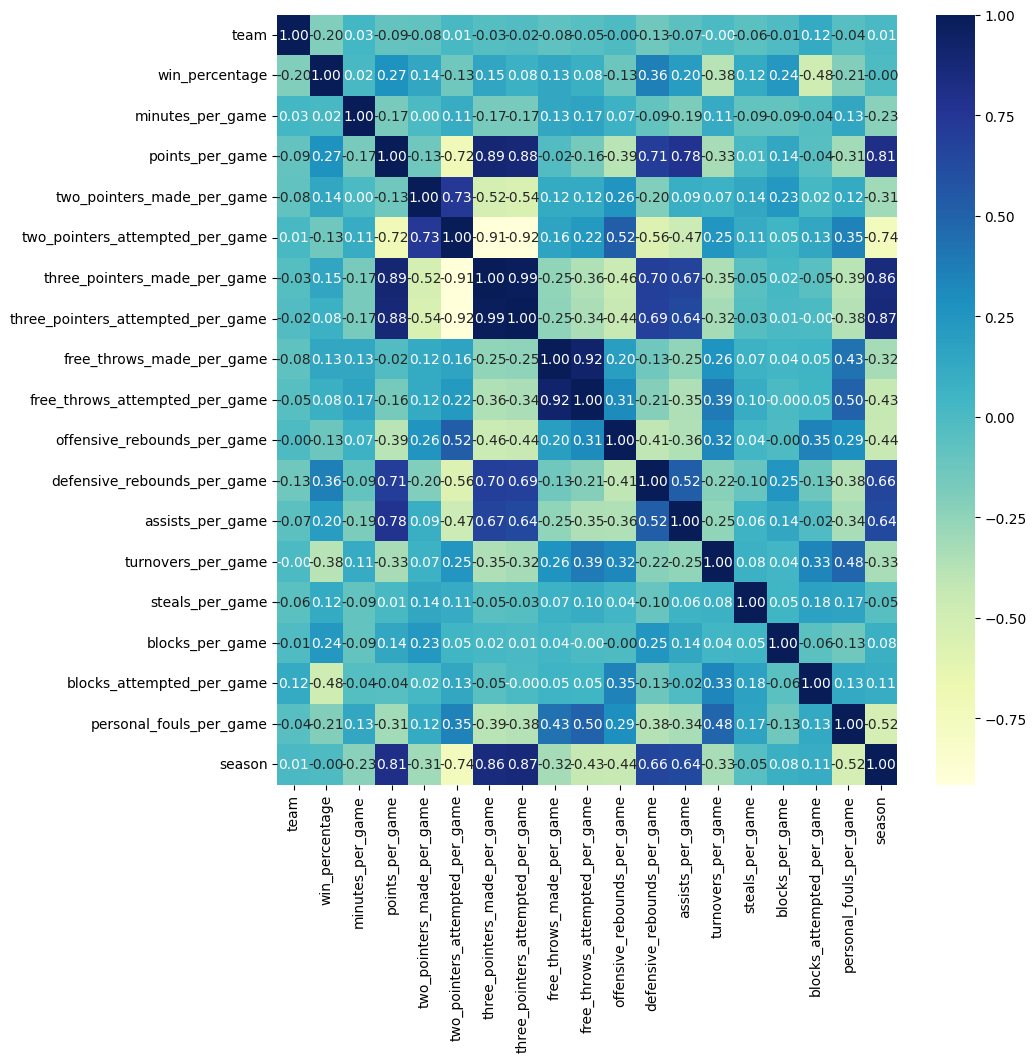

In [4]:
plt.figure(figsize=(10, 10))
p1 = sns.heatmap(df_nba_data.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.tight_layout
plt.show()

From the heat map, there are a few interesting trends.

The points per game and three pointers made/attempted per game are correlated with the season.
Also, points per game has a high correlation with assists per game and three pointers per game.
Three pointers made have a high inverse correlation with two pointers made. This makes sense because a team has a finite number of possessions per game. A team collectively chooses whether to try a three-point attempt versus a two-point attempt.


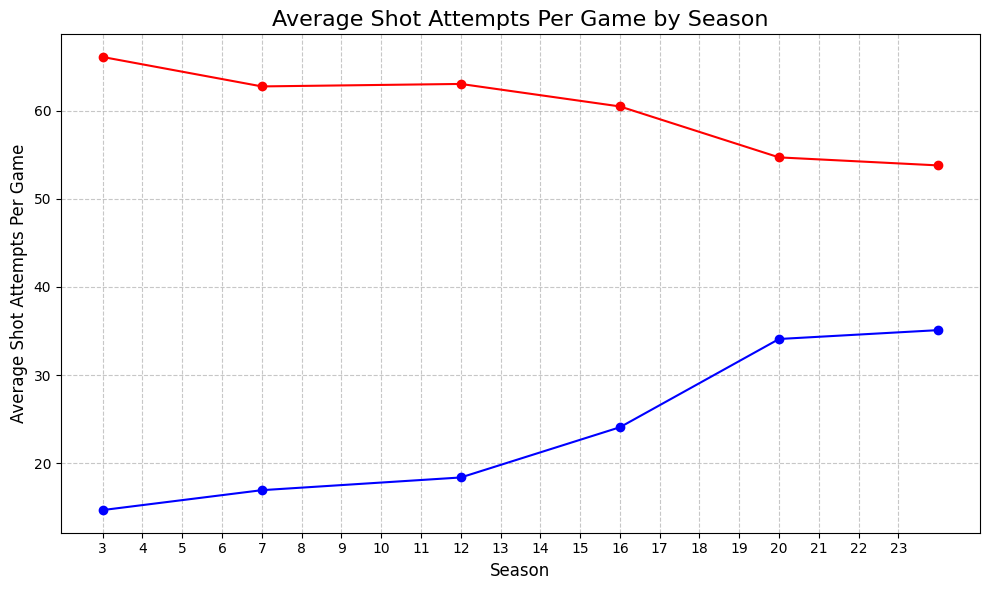

In [5]:

# Assuming 'df' is your DataFrame
# Group by 'season' and calculate the average 'three_pointers_attempted_per_game' for each season
average_three_pointers_by_season = (
    df_nba_data.groupby('season')['three_pointers_attempted_per_game']
    .mean()
)

average_two_pointers_by_season = (
    df_nba_data.groupby('season')['two_pointers_attempted_per_game']
    .mean()
)

# Plotting
plt.figure(figsize=(10, 6))
average_three_pointers_by_season.plot(kind='line', marker='o', color='blue', linestyle='-')
average_two_pointers_by_season.plot(kind='line', marker='o', color='red', linestyle='-')

# Customizing the plot
plt.title('Average Shot Attempts Per Game by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Shot Attempts Per Game', fontsize=12)
plt.xticks(ticks=range(3, 24), fontsize=10)  # Assuming seasons are labeled 1 to 24
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

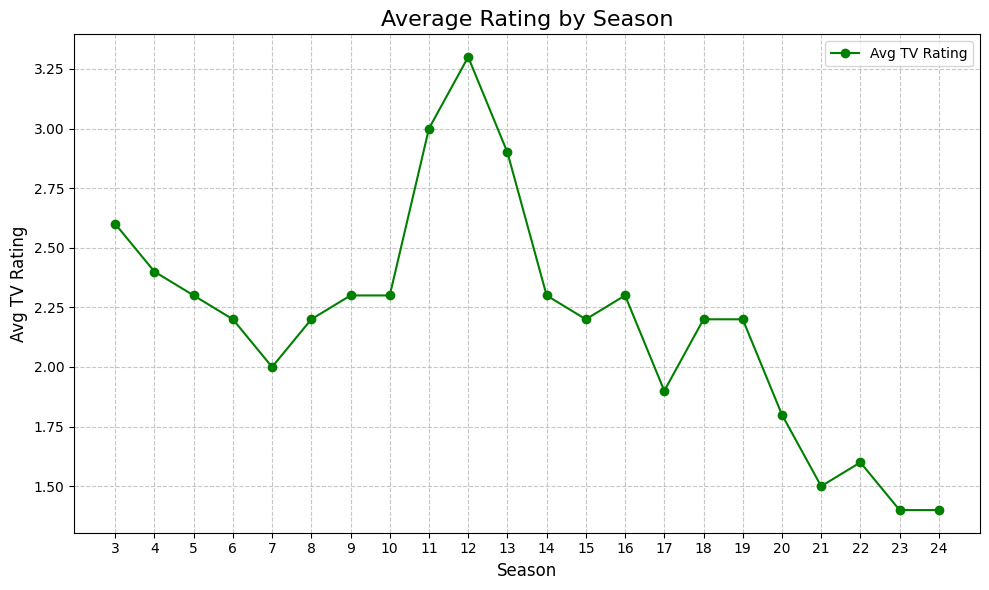

In [6]:
# Data
X = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Y = [1.4, 1.4, 1.6, 1.5, 1.8, 2.2, 2.2, 1.9, 2.3, 2.2, 2.3, 2.9, 3.3, 3, 2.3, 2.3, 2.2, 2, 2.2, 2.3, 2.4, 2.6]

# Reverse the Y list
Y = Y[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, Y, marker='o', color='green', linestyle='-', label='Avg TV Rating')

# Customizing the plot
plt.title('Average Rating by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Avg TV Rating', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Ensuring all X values are displayed
plt.xticks(ticks=X, fontsize=10)
plt.yticks(fontsize=10)

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:

df_nba_data['season'] = pd.Categorical(df_nba_data['season'])   # Overwrites 'team' column as a categorical column.
df_nba_data_lm = pd.get_dummies(df_nba_data, columns=['team', 'season'])

# Define X and y for training
y = df_nba_data_lm['win_percentage']
X = df_nba_data_lm.drop(columns=['win_percentage'])


# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# # Fit the data
# lr_model = LinearRegression()

# lr_model.fit(x_train, y_train)

# # Use test to determine if its a good fit
# print("R Score against test data: ",  lr_model.score(x_test, y_test))
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create a pipeline to scale data and fit LinearSVR
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Standardize the data
    ('svr', LinearRegression())  # LinearSVR model
])

# Train the model
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Test Set R^2:", r2)
print("Test Set MAE:", mae)
print("Test Set MSE:", mse)


Test Set R^2: 0.8043485934244473
Test Set MAE: 0.061227354429856246
Test Set MSE: 0.005177718823615425


I will try out a simpler model such as Linear Support Vector Regressor.

In [42]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create a pipeline to scale data and fit LinearSVR
pipeline2 = Pipeline([
    ('scaler', RobustScaler()),  # Standardize the data
    ('svr', LinearSVR(random_state=42, max_iter=50000))  # LinearSVR model
])

# Train the model
pipeline2.fit(x_train, y_train)

# Predict on the test set
y_pred2 = pipeline2.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)

print("Test Set R^2:", r2)
print("Test Set MAE:", mae)
print("Test Set MSE:", mse)


Test Set R^2: 0.7709961239252772
Test Set MAE: 0.06487345314104433
Test Set MSE: 0.006060358576441462


In [ ]:
# from sklearn.neural_network import MLPRegressor

# mlp_reg_model1 = MLPRegressor(random_state=42, max_iter=2000, hidden_layer_sizes=(6, 3)).fit(x_train2, y_train2)
# mlp_reg_model1.predict(x_test2)
# mlp_reg_model1.score(x_test2, y_test2)

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline

# Scale data
scaler = RobustScaler()

# MLPRegressor
mlp = MLPRegressor(max_iter=2000, random_state=42)

df_nba_data_mlp = df_nba_data

# Define X and y for training
y = df_nba_data_mlp['win_percentage']
X = df_nba_data_mlp.drop(columns=['win_percentage', 'minutes_per_game', 'two_pointers_made_per_game', 
    'two_pointers_attempted_per_game', 'three_pointers_made_per_game', 'three_pointers_attempted_per_game',
    'free_throws_made_per_game', 'free_throws_attempted_per_game', 'minutes_per_game', 'season', 'team'])


# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Pipeline to combine scaling and model
pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp', mlp)
])

# Hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(1,), (2,), (2,1), (6, 3), (9,), (18,), (18, 9), (27, 18)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01],
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Test set evaluation
best_model = grid_search.best_estimator_
print("Test Set R^2:", best_model.score(x_test, y_test))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (18,), 'mlp__learning_rate_init': 0.01}
Best Score: 0.02571405471498527
Test Set R^2: 0.0658421522489947
